# Exploratory Data Analysis (EDA)

## Purpose

Exploratory Data Analysis (EDA) is the first and most critical step in any statistical
analysis or hypothesis testing workflow.

The goals of this notebook are to:
- Understand the structure and quality of the dataset
- Explore distributions and relationships
- Identify potential assumption violations
- Motivate appropriate hypothesis tests

No formal hypothesis testing is performed here.
We only observe, visualize, and reason.


## 🟦 Imports & Setup

In [1]:
import sys
from pathlib import Path

# Get project root: notebooks/ → project/
PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Added to path:", PROJECT_ROOT)


Added to path: /home/arun/Documents/statistics-and-atmospheric-data/fundamentals_statistics/project


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_generation import generate_student_dataset

sns.set(style="whitegrid")


## 🟦 Load or Generate Data

In [4]:
# Option 1: generate data
df = generate_student_dataset(n=4000, random_state=42)

# Option 2 (later): load from CSV
# df = pd.read_csv("../data/student_performance.csv")

df.head()


,score,study_hours,attendance_rate,previous_gpa,gender,teaching_method,school_type,passed
0,96.519935,3.024277,86.325828,3.223925,M,A,Public,1
1,89.432564,3.749628,67.571284,3.057049,F,A,Public,1
2,82.580295,6.777638,57.309227,3.434704,M,C,Private,1
3,95.564780,3.652253,70.229279,3.268504,M,A,Public,1
4,100.000000,8.225269,77.573335,2.447844,M,A,Public,1


## 🟦 Dataset Overview

We begin by examining:
- number of observations
- feature types
- presence of missing values
- basic summary statistics


### 🟦 Shape, Info, Missing Values

df.shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            4000 non-null   float64
 1   study_hours      4000 non-null   float64
 2   attendance_rate  4000 non-null   float64
 3   previous_gpa     4000 non-null   float64
 4   gender           4000 non-null   object 
 5   teaching_method  4000 non-null   object 
 6   school_type      4000 non-null   object 
 7   passed           4000 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 250.1+ KB


In [6]:
df.isna().sum()

score              0
study_hours        0
attendance_rate    0
previous_gpa       0
gender             0
teaching_method    0
school_type        0
passed             0
dtype: int64

- The dataset contains several thousand observations.
- No missing values are present.
- Variables include both numerical and categorical features.
- This dataset is suitable for a wide range of hypothesis tests.


## 🟦 Summary Statistics

In [7]:
df.describe()

,score,study_hours,attendance_rate,previous_gpa,passed
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.0
mean,97.097901,5.993609,80.098960,3.009684,1.0
std,5.169628,1.969717,9.894696,0.395758,0.0
min,64.742227,0.000000,43.647998,1.500000,1.0
25%,95.945360,4.688991,73.388616,2.739407,1.0
50%,100.000000,5.984845,80.218666,3.011287,1.0
75%,100.000000,7.301484,87.006896,3.284205,1.0
max,100.000000,12.755536,100.000000,4.000000,1.0


## 🟦 Initial Observations

From summary statistics we can already note:
- Reasonable ranges for all variables
- No obvious data corruption
- Exam scores span the full 0–100 range
- Study behavior and GPA show realistic variation

These observations support further statistical analysis.


## 🟦 Distribution of Exam Scores

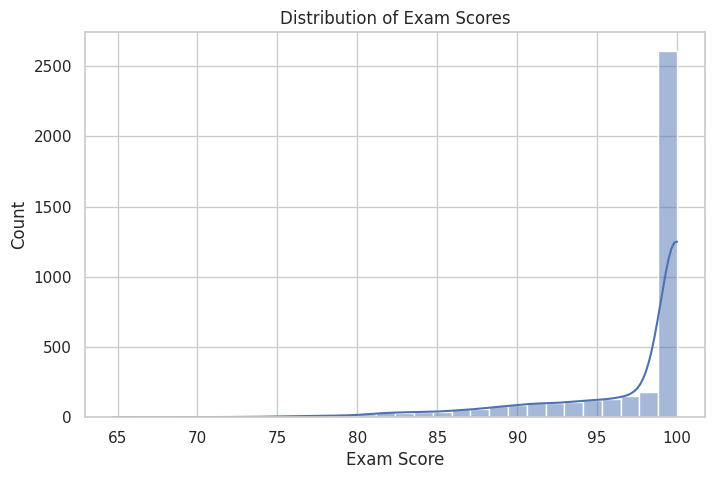

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["score"], bins=30, kde=True)
plt.xlabel("Exam Score")
plt.title("Distribution of Exam Scores")
plt.show()

### 🟦 Distribution of Exam Scores

- The distribution is approximately bell-shaped
- Mild skewness is present, as expected in real data
- No extreme outliers dominate the distribution

This suggests that **parametric tests (t-test, ANOVA)** may be appropriate,
though assumptions must still be checked later.


## 🟦 Boxplot for Outliers

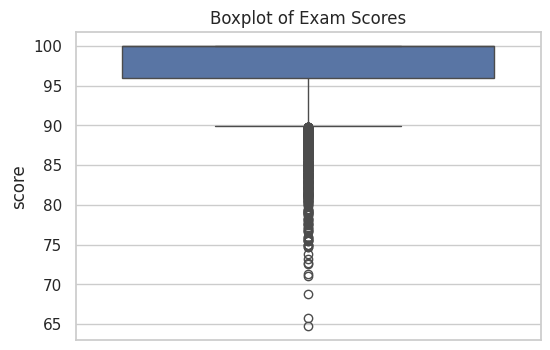

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["score"])
plt.title("Boxplot of Exam Scores")
plt.show()


## 🟦 Outlier Discussion

- Some extreme values exist, but they are not implausible
- No immediate need for outlier removal
- Robust and non-parametric tests will still be considered later

## 🟦 Scores by Gender

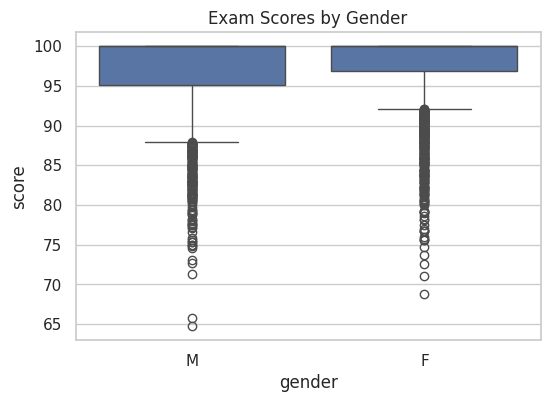

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="gender", y="score", data=df)
plt.title("Exam Scores by Gender")
plt.show()


## 🟦 Visual Hypothesis (Gender)

### Scores by Gender

- Median and mean scores appear slightly higher for one group
- Distributions overlap substantially

This motivates a **two-sample hypothesis test**, but no conclusion is drawn yet.

## 🟦 Scores by Teaching Method

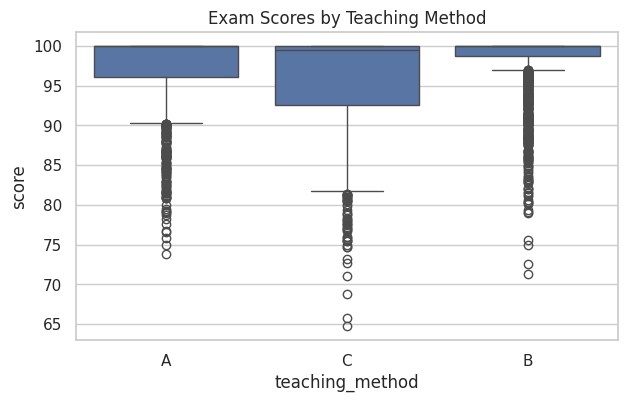

In [11]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="teaching_method", y="score", data=df)
plt.title("Exam Scores by Teaching Method")
plt.show()


## 🟦 Visual Hypothesis (ANOVA)

### Scores by Teaching Method

- Clear separation between groups is visible
- Variability within groups is smaller than variability between groups

This strongly motivates **one-way ANOVA** followed by post-hoc testing.


## 🟦 Relationship with Continuous Variables

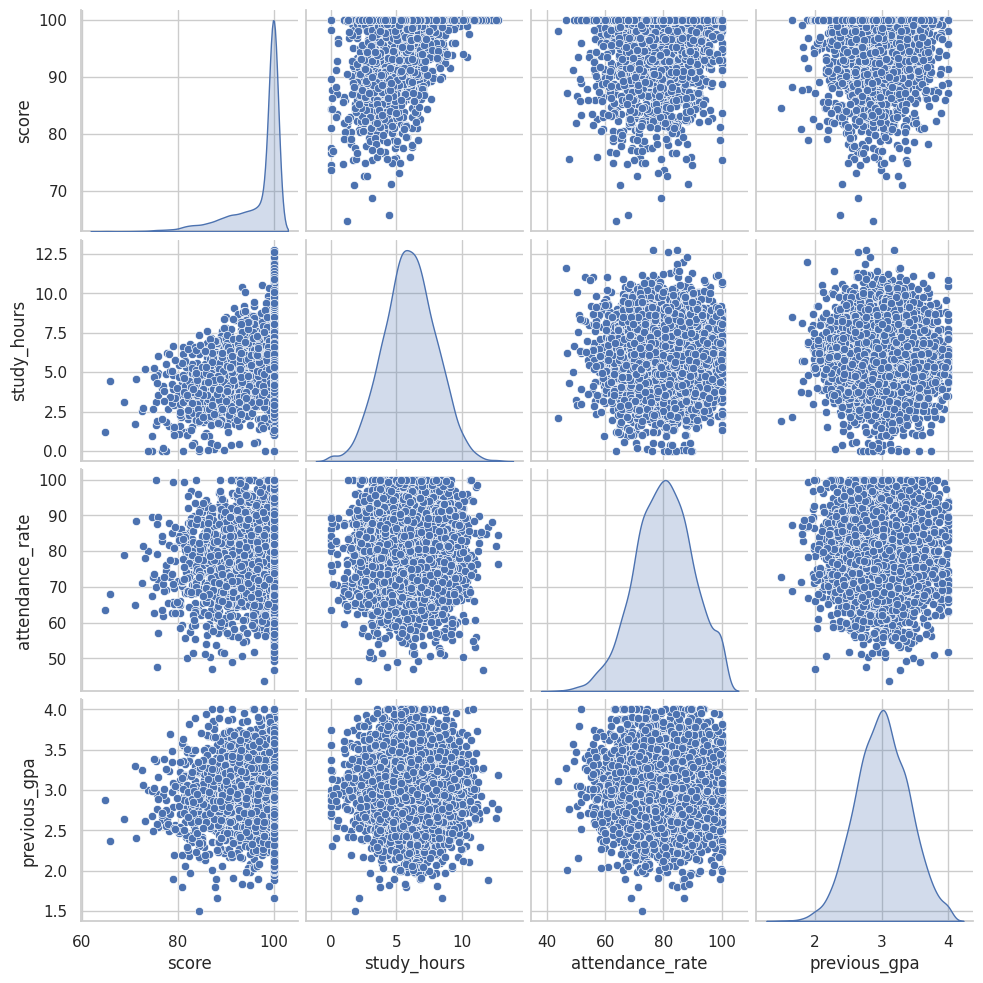

In [12]:
sns.pairplot(
    df[["score", "study_hours", "attendance_rate", "previous_gpa"]],
    diag_kind="kde"
)
plt.show()


## 🟦 Relationship Interpretation

### Relationships Between Variables

- Score increases with study hours and GPA
- Attendance shows a positive but weaker relationship
- Linear trends are visible

This suggests regression-based hypothesis testing will be meaningful.


## 🟦 Group-wise Aggregation

In [13]:
df.groupby("teaching_method")["score"].agg(
    ["count", "mean", "std"]
)


,count,mean,std
teaching_method,,,
A,1217,97.178087,4.971875
B,1616,98.135371,4.080564
C,1167,95.577645,6.245328


## EDA Summary

From exploratory analysis we conclude:

- The dataset is clean and well-behaved
- Parametric tests are likely applicable
- Group differences are visually evident
- Relationships between predictors and outcome are meaningful

EDA has guided our choice of statistical methods.
Formal hypothesis testing begins in the next notebook.
